Text(0.5, 1.0, 'Random Classification Data with 2 classes')

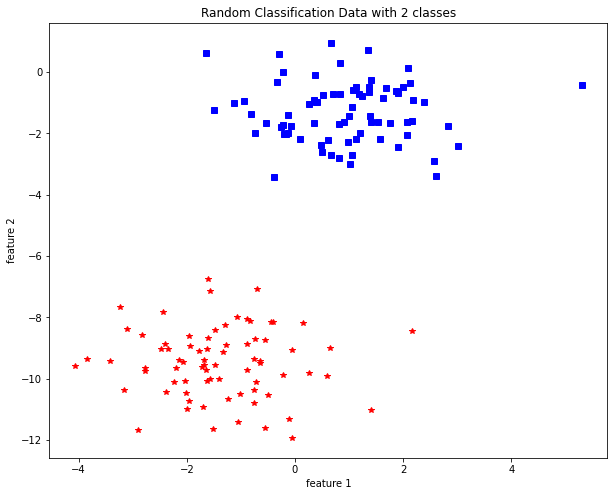

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets 
x ,y  = datasets.make_blobs(n_samples = 150, n_features =2, centers = 2, cluster_std =1.05,random_state =2)
#plotting

x.shape 
fig = plt.figure(figsize =(10,8))
plt.plot(x[:, 0][y == 0 ], x[: ,1][y==0], 'r*')
plt.plot(x[:, 0][y == 1 ], x[: ,1][y==1], 'bs')

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [2]:
def perceptron(x, y, lr, epochs):
    # x --> Inputs.
    # y --> labels/target.
    # lr --> learning rate 
    # epochs --> Number of iterations.
    
    #m->number of training examples
    #n-> numbers of features
    
    m,n = x.shape
    
    #Intializing parapeters(theta ) to zeros
    # +1 in n+1 for the bias term
    
    theta = np.zeros((n+1,1))
    
    #empty list to store how many examples were 
    #misclassified at every iteration
    
    n_miss_list = []
    
    
    #Training 
    for epoch in range(epochs):
        
        #variable to store misclassified.
        n_miss = 0
        
        #looping for every example
        for idx, x_i in enumerate(x):
            
            #inserting 1 for bias x0 = 1
            x_i = np.insert(x_i, 0,1).reshape(-1,1)
            
            #calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T,theta))
            
            #updating if the example is misclassified
            if (np.squeeze(y_hat) - y[idx])!= 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                #incrementing by 1
                n_miss +=1
                
           #appending number of misclassified examples
           # at every iteration
            n_miss_list.append(n_miss)
            
    return theta, n_miss_list        

In [3]:
def step_func(z):
    return 1.0 if (z > 0) else 0.0

def plot_decision_boundary(x, theta):
    
    # x --> Inputs
    #theta --> parameters
    
    #the line is y=mx+c
    #so, Equate mx+c = theta,x0 + theta1.x1 +theta2.x2
    #solving we find m and c
    x1 = [min(x[:,0]), max(x[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    #plotting
    fig = plt.figure(figsize=(10,6))
    plt.plot(x[:, 0][y ==0], x[:,1][y==0], "r^")
    plt.plot(x[:, 0][y ==1], x[:,1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("perceptron algorithm")
    plt.plot(x1,x2,'y-')

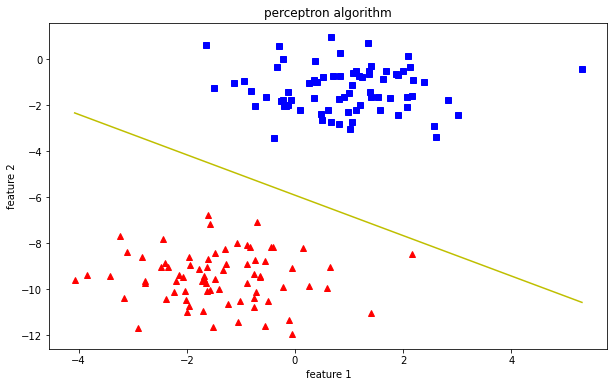

In [4]:
theta, miss_1 = perceptron(x, y, 0.5 , 100)
plot_decision_boundary(x, theta)